<a href="https://colab.research.google.com/github/slapazromero/EjercicioKNN_Wine/blob/main/Ejercicios_KNN_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de librerías necesarias.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

# Preproceso.

## Importacion de los datos del dataset.

In [2]:
wine = pd.read_csv('WineQT.csv')

## Mostrar las primeras y ultimas filas del dataframe importado.

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


## Modificaciones de los datos.

In [5]:
wine = wine.drop('Id', axis=1)

## Mostrar las primeras y ultimas filas del dataframe modificado.

In [6]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Mostrar parámetros estadísticos de los datos (media, desviación típica, cuartiles, etc.)

In [8]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Mostrar un mapa de calor que indique la correlación entre variables.

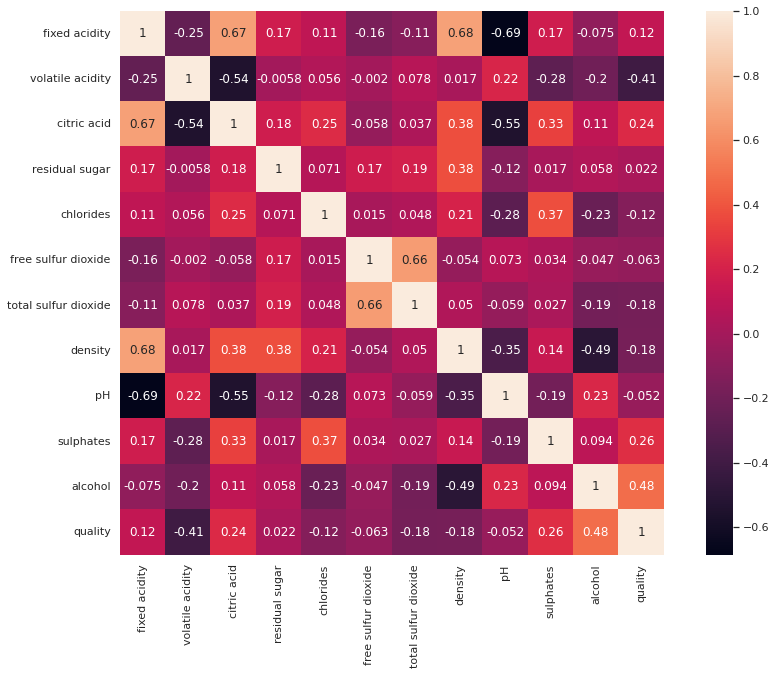

In [9]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(wine.corr(), square=True, annot=True)

## Seleccionar las características a tener en cuenta en el estudio.

In [10]:
caracteristicas = ['volatile acidity', 'alcohol']
resultado = ['quality']

## Separar datos entre datos de entrada y etiquetas (resultados).



In [11]:
x_wine = wine[caracteristicas]
y_wine = wine[resultado]

## Separar datos entre entrenamiento y prueba (usando un 75% para entrenamiento y 25% para test)


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_wine, y_wine, test_size=0.25)

# Modelo de KNeighborsClassifier

## Optimización de hiperparámetros.

### Validación cruzada.

In [13]:
def validacion_cruzada(index, x_train, y_train, weights):
  kf = KFold(n_splits=5)

  model = KNeighborsClassifier(index, weights=weights)
  scores = []

  for train_fold, test_fold in kf.split(x_train):
    model.fit(x_train.values[train_fold], y_train.values[train_fold].ravel())
    y_predict = model.predict(x_train.values[test_fold])
    scores.append(accuracy_score(y_train.values[test_fold], y_predict))
  return np.mean(scores)


In [14]:
resultados = []
for i in range(2):
  for j in range(1, 31):
    if i == 0:
      resultados.append((validacion_cruzada(j, x_train, y_train, 'uniform'), j, 'uniform'))
    elif i == 1:
      resultados.append((validacion_cruzada(j, x_train, y_train, 'distance'), j, 'distance'))

mejor_resultado = max(resultados)
print(mejor_resultado)

(0.6184754521963824, 27, 'distance')


## Entrenamiento y predicción.

### Elegir, instanciar y entrenar el modelo.

In [15]:
model = KNeighborsClassifier(mejor_resultado[1], weights=mejor_resultado[2])

### Realizar una predicción con los datos de prueba.

In [16]:
model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=27, weights='distance')

In [17]:
y_predict = model.predict(x_test)

## Evaluación.

###  Mostrar el porcentaje de elementos correctamente clasificados.

In [18]:
accuracy_score(y_test, y_predict)

0.6013986013986014

### Mostrar la predicción realizada (imprimir la variable con la predicción).

In [19]:
y_predict

array([5, 5, 6, 5, 6, 7, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 6,
       5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 5, 7, 7, 7, 6, 7, 5, 5, 6, 5, 6, 6,
       5, 7, 6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 5, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 7, 7, 6,
       7, 7, 6, 6, 5, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 6, 5,
       6, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 4, 5, 5, 7, 6, 6, 6, 5, 6, 6, 6,
       6, 6, 7, 6, 6, 6, 6, 6, 5, 6, 5, 7, 6, 6, 7, 5, 7, 5, 5, 5, 6, 5,
       6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 7, 6, 6, 6, 6, 5, 5,
       5, 7, 6, 6, 5, 7, 6, 6, 7, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5,
       5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 7, 5, 6, 6, 5,
       5, 6, 7, 6, 6, 6, 6, 7, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 5, 6, 5, 7, 6, 5, 6, 6, 6, 5, 6, 7, 5,
       5, 7, 6, 6, 5, 7, 8, 5, 5, 6, 7, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5])

### Representar gráficamente la clasificación obtenida (matriz de confusión).

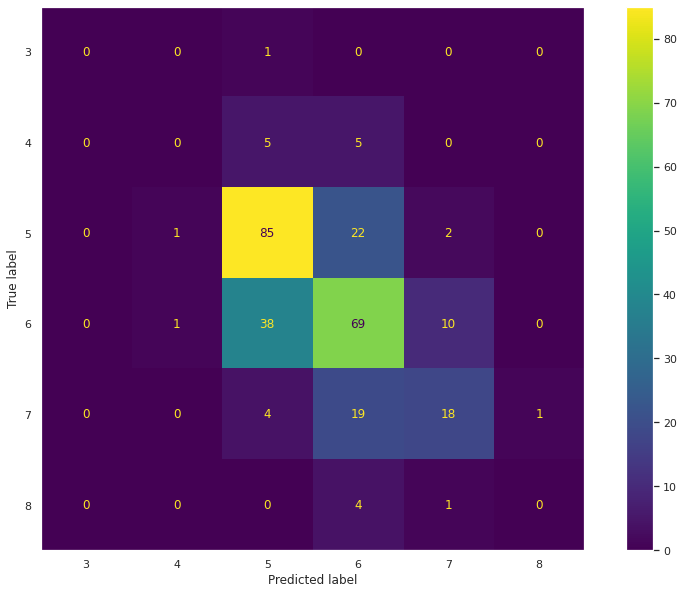

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.grid(b=None)

# Modelo de RadiusNeighborsClassifier

## Optimización de hiperparámetros.

### Validación cruzada.

In [21]:
def validacion_cruzada_radius(index, x_train, y_train, weights):
  kf = KFold(n_splits=5)

  model = RadiusNeighborsClassifier(index, weights=weights)
  scores = []

  for train_fold, test_fold in kf.split(x_train):
    model.fit(x_train.values[train_fold], y_train.values[train_fold].ravel())
    y_predict = model.predict(x_train.values[test_fold])
    scores.append(accuracy_score(y_train.values[test_fold], y_predict))
  return np.mean(scores)


In [22]:
resultados = []
for i in range(2):
  for k in range(1, 31):
    if i == 0:
      resultados.append((validacion_cruzada_radius(k, x_train, y_train, 'uniform'), k, 'uniform'))
    elif i == 1:
      resultados.append((validacion_cruzada_radius(k, x_train, y_train, 'distance'), k, 'distance'))

mejor_resultado_radius = max(resultados)
print(mejor_resultado_radius)

(0.6126206990344077, 1, 'distance')


## Entrenamiento y predicción.

### Elegir, instanciar y entrenar el modelo.

In [23]:
model_radius = RadiusNeighborsClassifier(mejor_resultado_radius[1], weights=mejor_resultado_radius[2])

### Realizar una predicción con los datos de prueba.

In [24]:
model_radius.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:501: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._fit(X, y)


RadiusNeighborsClassifier(radius=1, weights='distance')

In [25]:
y_predict_radius = model_radius.predict(x_test)

## Evaluación.

###  Mostrar el porcentaje de elementos correctamente clasificados.

In [26]:
accuracy_score(y_test, y_predict_radius)

0.541958041958042

### Mostrar la predicción realizada (imprimir la variable con la predicción).

In [27]:
y_predict_radius

array([5, 5, 6, 5, 6, 7, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 6,
       5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 5, 5, 7, 7, 5, 7, 5, 5, 6, 5, 6, 6,
       5, 7, 5, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 5, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 7, 7, 6,
       6, 7, 6, 6, 5, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 6, 5,
       6, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 4, 5, 5, 7, 6, 6, 6, 5, 6, 6, 6,
       6, 6, 7, 6, 6, 6, 5, 6, 5, 6, 5, 7, 6, 6, 7, 5, 7, 5, 5, 5, 5, 5,
       6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 7, 6, 6, 6, 6, 5, 5,
       5, 6, 6, 5, 5, 6, 6, 6, 7, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5,
       5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 7, 5, 6, 6, 5,
       5, 6, 7, 6, 6, 6, 6, 7, 7, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6,
       5, 6, 6, 6, 6, 6, 6, 6, 7, 5, 6, 5, 7, 8, 5, 6, 6, 5, 5, 6, 6, 6,
       5, 7, 6, 6, 5, 7, 8, 5, 5, 6, 7, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 5])

### Representar gráficamente la clasificación obtenida (matriz de confusión).

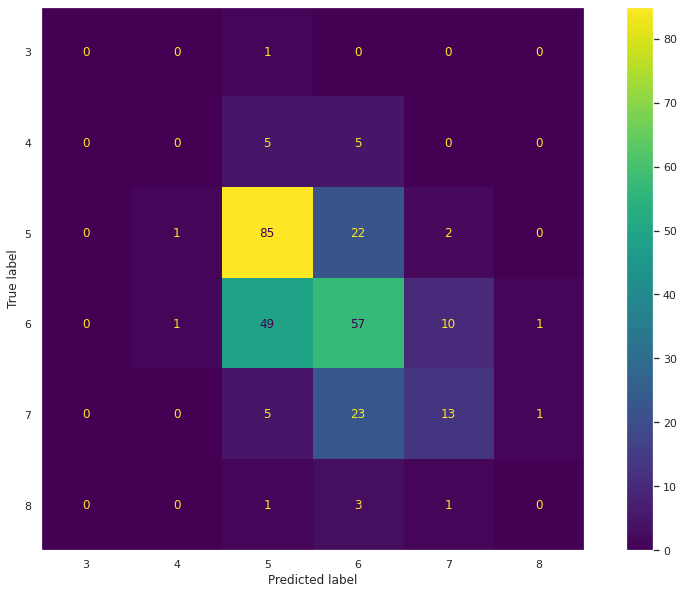

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_radius)
plt.grid(b=None)

# Metric Euclídea

In [29]:
model_euclidea = KNeighborsClassifier(mejor_resultado[1], weights=mejor_resultado[2], metric='euclidean')

In [30]:
model_euclidea.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=27, weights='distance')

In [31]:
y_predict = model_euclidea.predict(x_test)

In [32]:
accuracy_score(y_test, y_predict)

0.6013986013986014